# Name of project- Laptop Price Prediction
# Involves-Data analysis and Predictive Modeling
# Performed by- Muskan Bansal,Nisha Mehta,Khyati Ojha and Harshita Singh


# Importing libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset

In [6]:
df=pd.read_csv(r"laptop_price.csv",encoding='iso-8859-1')

# Shape of dataset

In [8]:
df.shape

(1303, 12)

# Sneak-Peek at the data

In [10]:
df.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook     NaN   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory  OpSys  Weight  Price_euros  
0            128GB SSD  macOS  1.37kg      1339.69  
1  128GB Flash Storage  macOS  1.34kg       898.94  
2            256GB SSD  No OS  1.86kg       575.00  
3            512GB SSD  macOS  1.83kg      2537.45  
4            256GB SSD  macOS  1.37kg      1803.60

In [11]:
df.tail()

laptop_ID Company                              Product  \
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
1298  2 in 1 Convertible    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299  2 in 1 Convertible    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300            Notebook    14.0                                    1366x768   
1301            Notebook    15.6                                    1366x768   
1302            Notebook    15.6                                    1366x768   

                                       Cpu   Ram              Memory  \
1298            Intel Core i7 6500U 2.5GHz   4GB           128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB           512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB  64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB             1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB           500GB HDD   

           OpSys  Weight  Price_euros  
1298  Windows 10   1.8kg        638.0  
1299  Windows 10   1.3kg       1499.0  
1300  Windows 10   1.5kg        229.0  
1301  Windows 10  2.19kg        764.0  
1302  Windows 10   2.2kg        369.0

# Columns in dataset

In [13]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

# Description

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1298 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Statistical summary

In [17]:
df.describe()

laptop_ID       Inches  Price_euros
count  1303.000000  1298.000000  1303.000000
mean    660.155794    15.016333  1123.686992
std     381.172104     1.428457   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000

# Data Pre-Processing

In [19]:
# Checking total number of null values

In [20]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              5
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [21]:
# Replacing all null values with mean 

In [22]:
df['Inches'] = df['Inches'].fillna(df['Inches'].mean())

In [23]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [24]:
# Checking duplicate rows and cols

In [25]:
df.duplicated().sum()

0

In [26]:
df.T.duplicated().sum()

0

In [27]:
#dropping laptop_id column

In [28]:
df.drop(columns=['laptop_ID','Product'],inplace=True)

In [29]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [30]:
df.head()

Company   TypeName     Inches                    ScreenResolution  \
0   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook  13.300000                            1440x900   
2      HP   Notebook  15.600000                   Full HD 1920x1080   
3   Apple  Ultrabook  15.016333  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  OpSys  Weight  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD  macOS  1.37kg   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage  macOS  1.34kg   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD  No OS  1.86kg   
3        Intel Core i7 2.7GHz  16GB            512GB SSD  macOS  1.83kg   
4        Intel Core i5 3.1GHz   8GB            256GB SSD  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [31]:
df['Ram']=df['Ram'].str.replace('GB',' ')
df['Weight']=df['Weight'].str.replace('kg',' ')

In [32]:
df.head()

Company   TypeName     Inches                    ScreenResolution  \
0   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook  13.300000                            1440x900   
2      HP   Notebook  15.600000                   Full HD 1920x1080   
3   Apple  Ultrabook  15.016333  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  OpSys Weight  \
0        Intel Core i5 2.3GHz   8             128GB SSD  macOS  1.37    
1        Intel Core i5 1.8GHz   8   128GB Flash Storage  macOS  1.34    
2  Intel Core i5 7200U 2.5GHz   8             256GB SSD  No OS  1.86    
3        Intel Core i7 2.7GHz  16             512GB SSD  macOS  1.83    
4        Intel Core i5 3.1GHz   8             256GB SSD  macOS  1.37    

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [33]:
df['Ram']=df['Ram'].astype('int')
df['Weight']=df['Weight'].astype('float')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(6)
memory usage: 96.8+ KB


In [35]:
#Feature Engineering

In [36]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [37]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [41]:
df.head()

Company   TypeName     Inches                    ScreenResolution  \
0   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook  13.300000                            1440x900   
2      HP   Notebook  15.600000                   Full HD 1920x1080   
3   Apple  Ultrabook  15.016333  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  OpSys  Weight  \
0        Intel Core i5 2.3GHz    8            128GB SSD  macOS    1.37   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage  macOS    1.34   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD  No OS    1.86   
3        Intel Core i7 2.7GHz   16            512GB SSD  macOS    1.83   
4        Intel Core i5 3.1GHz    8            256GB SSD  macOS    1.37   

   Price_euros  Touchscreen  Ips  
0      1339.69            0    1  
1       898.94            0    0  
2       575.00            0    0  
3      2537.45            0    1  
4      1803.60            0    1

In [46]:
df.tail()

Company            TypeName  Inches  \
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu  Ram              Memory  \
1298            Intel Core i7 6500U 2.5GHz    4           128GB SSD   
1299            Intel Core i7 6500U 2.5GHz   16           512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz    2  64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz    6             1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz    4           500GB HDD   

           OpSys  Weight  Price_euros  Touchscreen  Ips  
1298  Windows 10    1.80        638.0            1    1  
1299  Windows 10    1.30       1499.0            1    1  
1300  Windows 10    1.50        229.0            0    0  
1301  Windows 10    2.19        764.0            0    0  
1302  Windows 10    2.20        369.0            0    0

In [55]:
new_scr=df['ScreenResolution'].str.split('x',n=1,expand=True)
new_scr

0     1
0             IPS Panel Retina Display 2560  1600
1                                      1440   900
2                              Full HD 1920  1080
3             IPS Panel Retina Display 2880  1800
4             IPS Panel Retina Display 2560  1600
...                                     ...   ...
1298   IPS Panel Full HD / Touchscreen 1920  1080
1299  IPS Panel Quad HD+ / Touchscreen 3200  1800
1300                                   1366   768
1301                                   1366   768
1302                                   1366   768

[1303 rows x 2 columns]

In [58]:
df['X-res']=new_scr[0]
df['Y-res']=new_scr[1]

In [67]:
df['X-res']=df['X-res'].str.replace(',',' ').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [71]:
df.head()

Company   TypeName     Inches                    ScreenResolution  \
0   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook  13.300000                            1440x900   
2      HP   Notebook  15.600000                   Full HD 1920x1080   
3   Apple  Ultrabook  15.016333  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  OpSys  Weight  \
0        Intel Core i5 2.3GHz    8            128GB SSD  macOS    1.37   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage  macOS    1.34   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD  No OS    1.86   
3        Intel Core i7 2.7GHz   16            512GB SSD  macOS    1.83   
4        Intel Core i5 3.1GHz    8            256GB SSD  macOS    1.37   

   Price_euros  Touchscreen  Ips X-res Y-res  
0      1339.69            0    1  2560  1600  
1       898.94            0    0  1440   900  
2       575.00            0    0  1920  1080  
3      2537.45            0    1  2880  1800  
4      1803.60            0    1  2560  1600

In [73]:
df['X-res'] = df['X-res'].astype('int')
df['Y-res'] = df['Y-res'].astype('int')


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price_euros       1303 non-null   float64
 10  Touchscreen       1303 non-null   int64  
 11  Ips               1303 non-null   int64  
 12  X-res             1303 non-null   int32  
 13  Y-res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(6)
memory usage: 127.4+ KB


# correlation

In [77]:
numeric_df = df.select_dtypes(include=['int64', 'float64','int32'])
numeric_df.corr()['Price_euros']

Inches         0.068256
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X-res          0.556529
Y-res          0.552809
Name: Price_euros, dtype: float64

In [78]:
df['ppi']=(((df['X-res']**2) + (df['Y-res']**2))**0.5/df['Inches']).astype('float')

In [79]:
numeric_df = df.select_dtypes(include=['int64', 'float64','int32'])
numeric_df.corr()['Price_euros']

Inches         0.068256
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X-res          0.556529
Y-res          0.552809
ppi            0.473667
Name: Price_euros, dtype: float64

In [80]:
df.head()

Company   TypeName     Inches                    ScreenResolution  \
0   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook  13.300000                            1440x900   
2      HP   Notebook  15.600000                   Full HD 1920x1080   
3   Apple  Ultrabook  15.016333  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook  13.300000  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  OpSys  Weight  \
0        Intel Core i5 2.3GHz    8            128GB SSD  macOS    1.37   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage  macOS    1.34   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD  No OS    1.86   
3        Intel Core i7 2.7GHz   16            512GB SSD  macOS    1.83   
4        Intel Core i5 3.1GHz    8            256GB SSD  macOS    1.37   

   Price_euros  Touchscreen  Ips  X-res  Y-res         ppi  
0      1339.69            0    1   2560   1600  226.983005  
1       898.94            0    0   1440    900  127.677940  
2       575.00            0    0   1920   1080  141.211998  
3      2537.45            0    1   2880   1800  226.169282  
4      1803.60            0    1   2560   1600  226.983005

In [81]:
df.drop(columns=['Inches','ScreenResolution','X-res','Y-res'],inplace=True)

In [82]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

   OpSys  Weight  Price_euros  Touchscreen  Ips         ppi  
0  macOS    1.37      1339.69            0    1  226.983005  
1  macOS    1.34       898.94            0    0  127.677940  
2  No OS    1.86       575.00            0    0  141.211998  
3  macOS    1.83      2537.45            0    1  226.169282  
4  macOS    1.37      1803.60            0    1  226.983005

In [84]:
df['Memory_Size']=df['Memory'].str.split(" ").str.get(0)
df['Memory_Type']=df['Memory'].str.split(" ").str.get(1)
df

Company            TypeName                                   Cpu  Ram  \
0      Apple           Ultrabook                  Intel Core i5 2.3GHz    8   
1      Apple           Ultrabook                  Intel Core i5 1.8GHz    8   
2         HP            Notebook            Intel Core i5 7200U 2.5GHz    8   
3      Apple           Ultrabook                  Intel Core i7 2.7GHz   16   
4      Apple           Ultrabook                  Intel Core i5 3.1GHz    8   
...      ...                 ...                                   ...  ...   
1298  Lenovo  2 in 1 Convertible            Intel Core i7 6500U 2.5GHz    4   
1299  Lenovo  2 in 1 Convertible            Intel Core i7 6500U 2.5GHz   16   
1300  Lenovo            Notebook  Intel Celeron Dual Core N3050 1.6GHz    2   
1301      HP            Notebook            Intel Core i7 6500U 2.5GHz    6   
1302    Asus            Notebook  Intel Celeron Dual Core N3050 1.6GHz    4   

                   Memory       OpSys  Weight  Price_euros  Touchscreen  Ips  \
0               128GB SSD       macOS    1.37      1339.69            0    1   
1     128GB Flash Storage       macOS    1.34       898.94            0    0   
2               256GB SSD       No OS    1.86       575.00            0    0   
3               512GB SSD       macOS    1.83      2537.45            0    1   
4               256GB SSD       macOS    1.37      1803.60            0    1   
...                   ...         ...     ...          ...          ...  ...   
1298            128GB SSD  Windows 10    1.80       638.00            1    1   
1299            512GB SSD  Windows 10    1.30      1499.00            1    1   
1300   64GB Flash Storage  Windows 10    1.50       229.00            0    0   
1301              1TB HDD  Windows 10    2.19       764.00            0    0   
1302            500GB HDD  Windows 10    2.20       369.00            0    0   

             ppi Memory_Size Memory_Type  
0     226.983005       128GB         SSD  
1     127.677940       128GB       Flash  
2     141.211998       256GB         SSD  
3     226.169282       512GB         SSD  
4     226.983005       256GB         SSD  
...          ...         ...         ...  
1298  157.350512       128GB         SSD  
1299  276.053530       512GB         SSD  
1300  111.935204        64GB       Flash  
1301  100.454670         1TB         HDD  
1302  100.454670       500GB         HDD  

[1303 rows x 13 columns]

In [85]:
df['Memory_Size'].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [86]:
j=[]
for i in df['Memory_Size']:
    if "GB" in i:
        j.append(int(i.replace("GB","")))
    else:
         j.append(float(i.replace("TB",""))*float(1024))
df['Memory_Size']=j
df['Memory_Size']=df['Memory_Size'].astype(int)
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

   OpSys  Weight  Price_euros  Touchscreen  Ips         ppi  Memory_Size  \
0  macOS    1.37      1339.69            0    1  226.983005          128   
1  macOS    1.34       898.94            0    0  127.677940          128   
2  No OS    1.86       575.00            0    0  141.211998          256   
3  macOS    1.83      2537.45            0    1  226.169282          512   
4  macOS    1.37      1803.60            0    1  226.983005          256   

  Memory_Type  
0         SSD  
1       Flash  
2         SSD  
3         SSD  
4         SSD

In [88]:
df.drop(columns=['Memory'],inplace=True)

In [90]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'OpSys', 'Weight', 'Price_euros',
       'Touchscreen', 'Ips', 'ppi', 'Memory_Size', 'Memory_Type'],
      dtype='object')

In [93]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [99]:
#extracting first 3 words from cpu column and assigning them into new col named 'cpu name'

In [104]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

Company   TypeName                         Cpu  Ram  OpSys  Weight  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8  macOS    1.37   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  macOS    1.34   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8  No OS    1.86   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16  macOS    1.83   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8  macOS    1.37   

   Price_euros  Touchscreen  Ips         ppi  Memory_Size Memory_Type  \
0      1339.69            0    1  226.983005          128         SSD   
1       898.94            0    0  127.677940          128       Flash   
2       575.00            0    0  141.211998          256         SSD   
3      2537.45            0    1  226.169282          512         SSD   
4      1803.60            0    1  226.983005          256         SSD   

        Cpu Name  
0  Intel Core i5  
1  Intel Core i5  
2  Intel Core i5  
3  Intel Core i7  
4  Intel Core i5

In [107]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [109]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head(20)

Company   TypeName                         Cpu  Ram       OpSys  Weight  \
0    Apple  Ultrabook        Intel Core i5 2.3GHz    8       macOS    1.37   
1    Apple  Ultrabook        Intel Core i5 1.8GHz    8       macOS    1.34   
2       HP   Notebook  Intel Core i5 7200U 2.5GHz    8       No OS    1.86   
3    Apple  Ultrabook        Intel Core i7 2.7GHz   16       macOS    1.83   
4    Apple  Ultrabook        Intel Core i5 3.1GHz    8       macOS    1.37   
5     Acer   Notebook     AMD A9-Series 9420 3GHz    4  Windows 10    2.10   
6    Apple  Ultrabook        Intel Core i7 2.2GHz   16    Mac OS X    2.04   
7    Apple  Ultrabook        Intel Core i5 1.8GHz    8       macOS    1.34   
8     Asus  Ultrabook  Intel Core i7 8550U 1.8GHz   16  Windows 10    1.30   
9     Acer  Ultrabook  Intel Core i5 8250U 1.6GHz    8  Windows 10    1.60   
10      HP   Notebook  Intel Core i5 7200U 2.5GHz    4       No OS    1.86   
11      HP   Notebook    Intel Core i3 6006U 2GHz    4       No OS    1.86   
12   Apple  Ultrabook        Intel Core i7 2.8GHz   16       macOS    1.83   
13    Dell   Notebook    Intel Core i3 6006U 2GHz    4  Windows 10    2.20   
14   Apple  Ultrabook      Intel Core M m3 1.2GHz    8       macOS    0.92   
15   Apple  Ultrabook        Intel Core i5 2.3GHz    8       macOS    1.37   
16    Dell   Notebook  Intel Core i7 7500U 2.7GHz    8  Windows 10    2.20   
17   Apple  Ultrabook        Intel Core i7 2.9GHz   16       macOS    1.83   
18  Lenovo   Notebook  Intel Core i3 7100U 2.4GHz    8       No OS    2.20   
19    Dell  Ultrabook  Intel Core i5 8250U 1.6GHz    8  Windows 10    1.22   

    Price_euros  Touchscreen  Ips         ppi  Memory_Size Memory_Type  \
0       1339.69            0    1  226.983005          128         SSD   
1        898.94            0    0  127.677940          128       Flash   
2        575.00            0    0  141.211998          256         SSD   
3       2537.45            0    1  226.169282          512         SSD   
4       1803.60            0    1  226.983005          256         SSD   
5        400.00            0    0  100.454670          500         HDD   
6       2139.97            0    1  220.534624          256       Flash   
7       1158.70            0    0  127.677940          256       Flash   
8       1495.00            0    0  157.350512          512         SSD   
9        770.00            0    1  157.350512          256         SSD   
10       393.90            0    0  100.454670          500         HDD   
11       344.99            0    0  141.211998          500         HDD   
12      2439.97            0    1  220.534624          256         SSD   
13       498.90            0    0  141.211998          256         SSD   
14      1262.40            0    1  226.415547          256         SSD   
15      1518.55            0    1  226.983005          256         SSD   
16       745.00            0    0  141.211998          256         SSD   
17      2858.00            0    1  220.534624          512         SSD   
18       499.00            0    0  141.211998         1024         HDD   
19       979.00            1    1  165.632118          128         SSD   

              Cpu Name              Cpu brand  
0        Intel Core i5          Intel Core i5  
1        Intel Core i5          Intel Core i5  
2        Intel Core i5          Intel Core i5  
3        Intel Core i7          Intel Core i7  
4        Intel Core i5          Intel Core i5  
5   AMD A9-Series 9420          AMD Processor  
6        Intel Core i7          Intel Core i7  
7        Intel Core i5          Intel Core i5  
8        Intel Core i7          Intel Core i7  
9        Intel Core i5          Intel Core i5  
10       Intel Core i5          Intel Core i5  
11       Intel Core i3          Intel Core i3  
12       Intel Core i7          Intel Core i7  
13       Intel Core i3          Intel Core i3  
14        Intel Core M  Other Intel Processor  
15       Intel Core i5          Intel Cor

In [110]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [112]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price_euros',
       'Touchscreen', 'Ips', 'ppi', 'Memory_Size', 'Memory_Type', 'Cpu brand'],
      dtype='object')

In [114]:
df.head()

Company   TypeName  Ram  OpSys  Weight  Price_euros  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37      1339.69            0    1   
1   Apple  Ultrabook    8  macOS    1.34       898.94            0    0   
2      HP   Notebook    8  No OS    1.86       575.00            0    0   
3   Apple  Ultrabook   16  macOS    1.83      2537.45            0    1   
4   Apple  Ultrabook    8  macOS    1.37      1803.60            0    1   

          ppi  Memory_Size Memory_Type      Cpu brand  
0  226.983005          128         SSD  Intel Core i5  
1  127.677940          128       Flash  Intel Core i5  
2  141.211998          256         SSD  Intel Core i5  
3  226.169282          512         SSD  Intel Core i7  
4  226.983005          256         SSD  Intel Core i5

In [116]:
df=pd.get_dummies(df,columns=['Memory_Type'])

In [120]:
df.head()

Company   TypeName  Ram  OpSys  Weight  Price_euros  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37      1339.69            0    1   
1   Apple  Ultrabook    8  macOS    1.34       898.94            0    0   
2      HP   Notebook    8  No OS    1.86       575.00            0    0   
3   Apple  Ultrabook   16  macOS    1.83      2537.45            0    1   
4   Apple  Ultrabook    8  macOS    1.37      1803.60            0    1   

          ppi  Memory_Size      Cpu brand  Memory_Type_Flash  Memory_Type_HDD  \
0  226.983005          128  Intel Core i5              False            False   
1  127.677940          128  Intel Core i5               True            False   
2  141.211998          256  Intel Core i5              False            False   
3  226.169282          512  Intel Core i7              False            False   
4  226.983005          256  Intel Core i5              False            False   

   Memory_Type_Hybrid  Memory_Type_SSD  
0               False             True  
1               False            False  
2               False             True  
3               False             True  
4               False             True

In [123]:
import warnings
warnings.filterwarnings('ignore')

df = df.replace({True: 1, False: 0})
df.head()

Company   TypeName  Ram  OpSys  Weight  Price_euros  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37      1339.69            0    1   
1   Apple  Ultrabook    8  macOS    1.34       898.94            0    0   
2      HP   Notebook    8  No OS    1.86       575.00            0    0   
3   Apple  Ultrabook   16  macOS    1.83      2537.45            0    1   
4   Apple  Ultrabook    8  macOS    1.37      1803.60            0    1   

          ppi  Memory_Size      Cpu brand  Memory_Type_Flash  Memory_Type_HDD  \
0  226.983005          128  Intel Core i5                  0                0   
1  127.677940          128  Intel Core i5                  1                0   
2  141.211998          256  Intel Core i5                  0                0   
3  226.169282          512  Intel Core i7                  0                0   
4  226.983005          256  Intel Core i5                  0                0   

   Memory_Type_Hybrid  Memory_Type_SSD  
0                   0                1  
1                   0                0  
2                   0                1  
3                   0                1  
4                   0                1

In [125]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [127]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [130]:
df['os'] = df['OpSys'].apply(cat_os)

In [132]:
df.head()

Company   TypeName  Ram  OpSys  Weight  Price_euros  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37      1339.69            0    1   
1   Apple  Ultrabook    8  macOS    1.34       898.94            0    0   
2      HP   Notebook    8  No OS    1.86       575.00            0    0   
3   Apple  Ultrabook   16  macOS    1.83      2537.45            0    1   
4   Apple  Ultrabook    8  macOS    1.37      1803.60            0    1   

          ppi  Memory_Size      Cpu brand  Memory_Type_Flash  Memory_Type_HDD  \
0  226.983005          128  Intel Core i5                  0                0   
1  127.677940          128  Intel Core i5                  1                0   
2  141.211998          256  Intel Core i5                  0                0   
3  226.169282          512  Intel Core i7                  0                0   
4  226.983005          256  Intel Core i5                  0                0   

   Memory_Type_Hybrid  Memory_Type_SSD                  os  
0                   0                1                 Mac  
1                   0                0                 Mac  
2                   0                1  Others/No OS/Linux  
3                   0                1                 Mac  
4                   0                1                 Mac

In [134]:
df.drop(columns=['OpSys'],inplace=True)

In [136]:
df.head()

Company   TypeName  Ram  Weight  Price_euros  Touchscreen  Ips         ppi  \
0   Apple  Ultrabook    8    1.37      1339.69            0    1  226.983005   
1   Apple  Ultrabook    8    1.34       898.94            0    0  127.677940   
2      HP   Notebook    8    1.86       575.00            0    0  141.211998   
3   Apple  Ultrabook   16    1.83      2537.45            0    1  226.169282   
4   Apple  Ultrabook    8    1.37      1803.60            0    1  226.983005   

   Memory_Size      Cpu brand  Memory_Type_Flash  Memory_Type_HDD  \
0          128  Intel Core i5                  0                0   
1          128  Intel Core i5                  1                0   
2          256  Intel Core i5                  0                0   
3          512  Intel Core i7                  0                0   
4          256  Intel Core i5                  0                0   

   Memory_Type_Hybrid  Memory_Type_SSD                  os  
0                   0                1                 Mac  
1                   0                0                 Mac  
2                   0                1  Others/No OS/Linux  
3                   0                1                 Mac  
4                   0                1                 Mac

In [138]:
numeric_df = df.select_dtypes(include=['int64', 'float64','int32'])
numeric_df.corr()['Price_euros']

Ram                   0.743007
Weight                0.210370
Price_euros           1.000000
Touchscreen           0.191226
Ips                   0.252208
ppi                   0.473667
Memory_Size          -0.125363
Memory_Type_Flash    -0.210823
Memory_Type_HDD      -0.426121
Memory_Type_Hybrid   -0.039386
Memory_Type_SSD       0.513609
Name: Price_euros, dtype: float64

In [140]:
df.drop(columns=['Memory_Type_Hybrid'],inplace=True)
df.head()

Company   TypeName  Ram  Weight  Price_euros  Touchscreen  Ips         ppi  \
0   Apple  Ultrabook    8    1.37      1339.69            0    1  226.983005   
1   Apple  Ultrabook    8    1.34       898.94            0    0  127.677940   
2      HP   Notebook    8    1.86       575.00            0    0  141.211998   
3   Apple  Ultrabook   16    1.83      2537.45            0    1  226.169282   
4   Apple  Ultrabook    8    1.37      1803.60            0    1  226.983005   

   Memory_Size      Cpu brand  Memory_Type_Flash  Memory_Type_HDD  \
0          128  Intel Core i5                  0                0   
1          128  Intel Core i5                  1                0   
2          256  Intel Core i5                  0                0   
3          512  Intel Core i7                  0                0   
4          256  Intel Core i5                  0                0   

   Memory_Type_SSD                  os  
0                1                 Mac  
1                0                 Mac  
2                1  Others/No OS/Linux  
3                1                 Mac  
4                1                 Mac

In [142]:
#Checking outliers

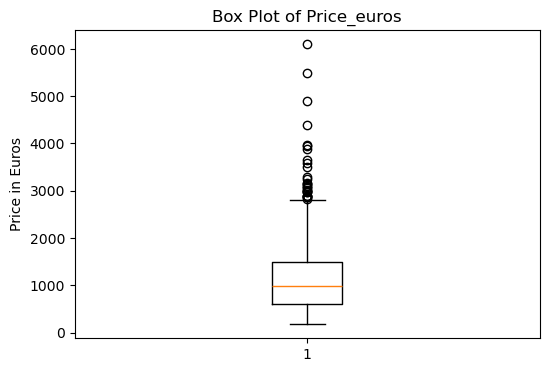

In [144]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Price_euros'])
plt.title('Box Plot of Price_euros')
plt.ylabel('Price in Euros')
plt.show()

In [145]:
len(df[df['Price_euros']>2800])

30

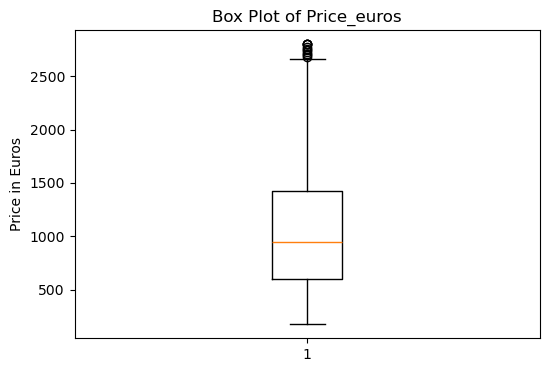

In [148]:
df=df[df['Price_euros']<2800].reset_index(drop=True)
plt.figure(figsize=(6, 4))
plt.boxplot(df['Price_euros'])
plt.title('Box Plot of Price_euros')
plt.ylabel('Price in Euros')
plt.show()

In [149]:
df.shape

(1272, 14)

# Data Visualization


In [153]:
# analysing price column using distplot

<Axes: xlabel='Price_euros', ylabel='Density'>

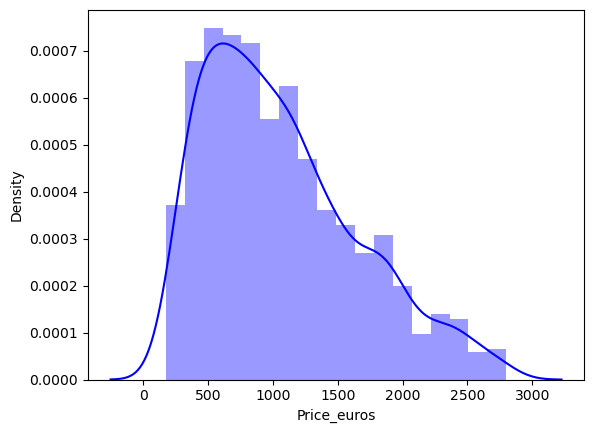

In [155]:
sns.distplot(df['Price_euros'],color='blue')

<Axes: xlabel='Price_euros', ylabel='Density'>

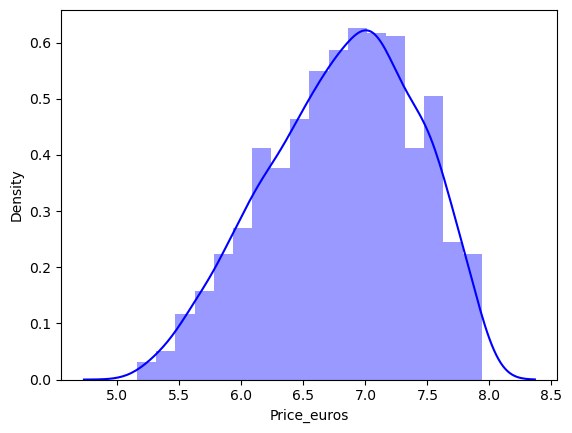

In [156]:
sns.distplot(np.log(df['Price_euros']),color='blue')

<Axes: xlabel='TypeName'>

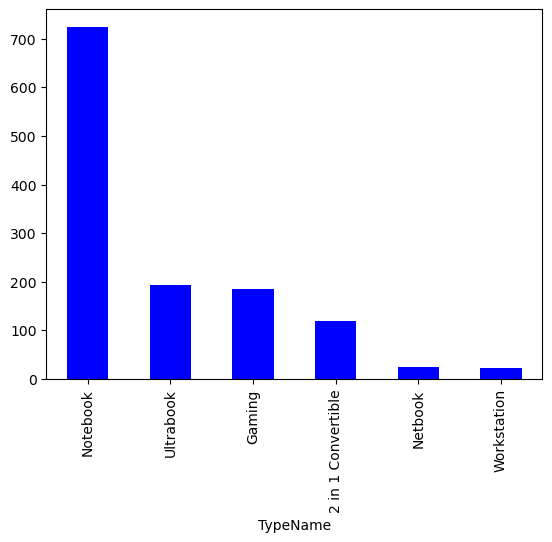

In [158]:
df['TypeName'].value_counts().plot(kind='bar',color='blue')

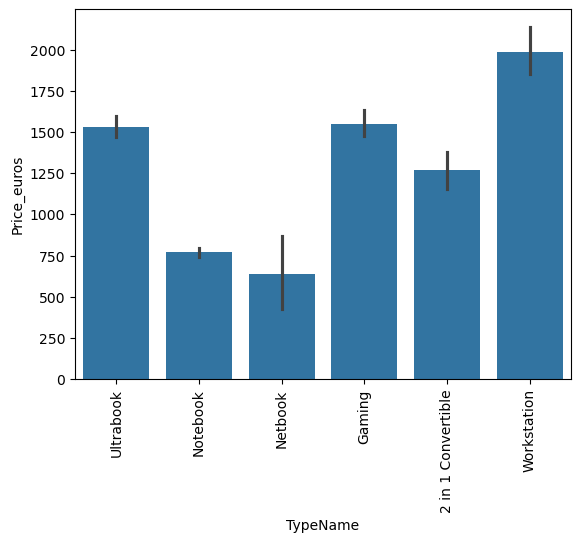

In [159]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Touchscreen'>

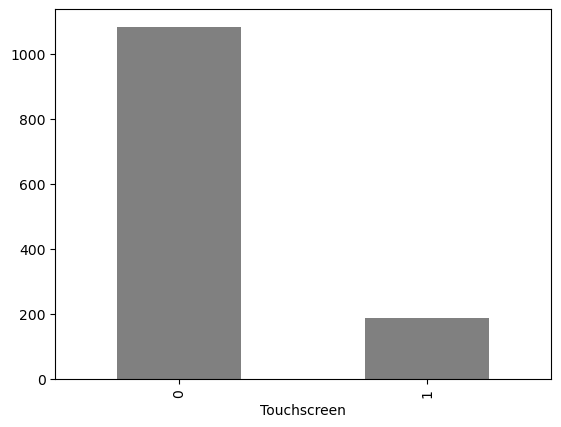

In [161]:
df['Touchscreen'].value_counts().plot(kind='bar',color='grey')

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

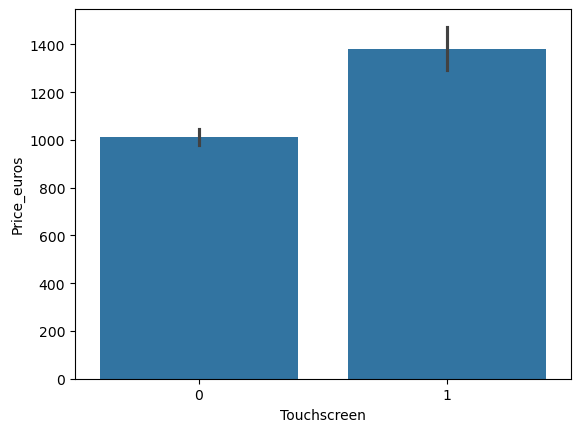

In [163]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

<Axes: xlabel='Ips', ylabel='Price_euros'>

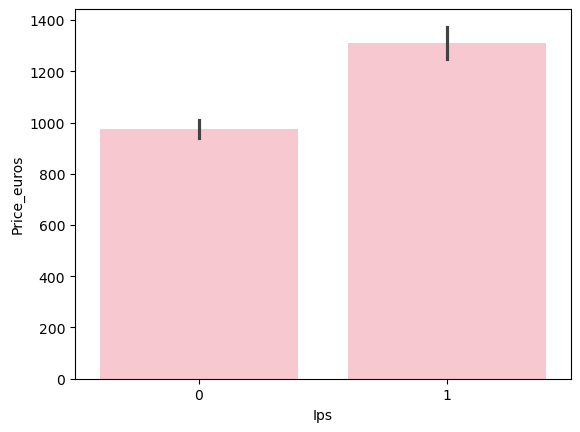

In [164]:
sns.barplot(x=df['Ips'],y=df['Price_euros'],color='pink')

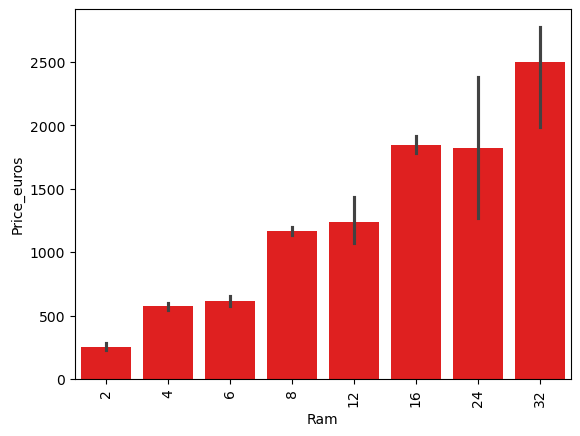

In [166]:
sns.barplot(x=df['Ram'],y=df['Price_euros'],color='red')
plt.xticks(rotation='vertical')
plt.show()

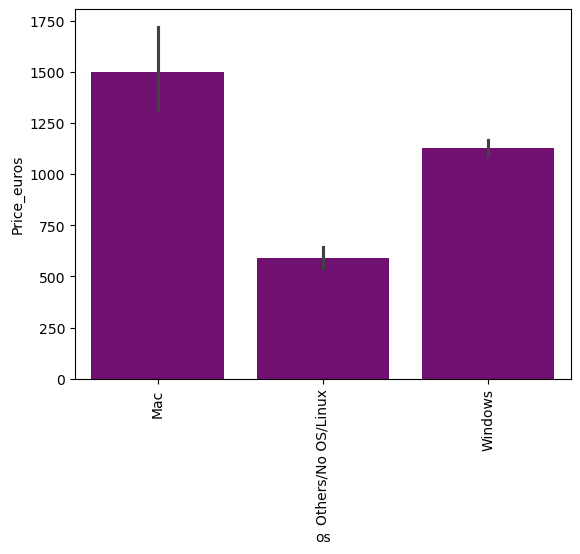

In [168]:
sns.barplot(x=df['os'],y=df['Price_euros'],color='purple')
plt.xticks(rotation='vertical')
plt.show()

In [169]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price_euros', 'Touchscreen',
       'Ips', 'ppi', 'Memory_Size', 'Cpu brand', 'Memory_Type_Flash',
       'Memory_Type_HDD', 'Memory_Type_SSD', 'os'],
      dtype='object')

In [171]:
# selecting features and target variable

In [173]:
x=df.loc[:,['Ram', 'Weight','Touchscreen',
       'Ips', 'ppi', 'Memory_Size','Memory_Type_Flash',
       'Memory_Type_HDD', 'Memory_Type_SSD']]
y=df.loc[:,['Price_euros']]


# Model Selection
# 1. Linear Regression

In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [177]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [178]:
lr.fit(x_train,y_train)

LinearRegression()

In [182]:
c=lr.intercept_
c

array([-299.9079142])

In [184]:
m=lr.coef_
m

array([[ 7.37961256e+01,  1.17402910e+01,  2.91332307e+01,
         3.43702126e+01,  3.35070949e+00, -2.26337620e-03,
        -1.38535101e-01,  8.41694527e+01,  3.56464870e+02]])

In [185]:
y_pred=lr.predict(x_test)

In [186]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6315843657407043

In [188]:
scores=[]
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_score(y_test,y_pred)
    scores.append(r2_score(y_test,y_pred))

In [189]:
print("Best random state=",np.argmax(scores))
print("Best R2_Score=",scores[np.argmax(scores)])

Best random state= 175
Best R2_Score= 0.7136599888679684


In [191]:
input_data = pd.DataFrame({
    'Ram': 8,
    'Weight': 1.37,
    'Touchscreen':1,
    'Ips': [1],
    'ppi': 226.983005,
    'Memory_Size': '128',
    'Memory_Type_Flash': 0,
    'Memory_Type_HDD': 0,
    'Memory_Type_SSD': 1,
})

predicted_price = lr.predict(input_data)
predicted_price



array([[1463.6773688]])

In [193]:
y_test=np.array(y_test).reshape(-1)
y_test

array([ 689.  , 1329.  ,  895.01,  295.  , 1475.  , 1018.  ,  540.  ,
       1396.  , 1258.  , 1135.  , 1860.99, 1119.  , 2049.  , 1043.  ,
        369.  ,  428.  , 1265.  ,  598.99, 1299.  ,  799.  ,  910.  ,
        699.  , 1534.  , 1090.  ,  716.  , 1349.  , 1629.  ,  259.  ,
       2499.  , 1145.  , 2499.  , 1195.  , 1495.  , 2663.  ,  398.99,
        521.86, 2382.  ,  829.  ,  559.  ,  949.  ,  329.  ,  439.  ,
       2267.86,  459.  , 2099.  ,  659.  ,  390.  , 1869.  , 1875.  ,
        720.32, 1469.  , 1079.  ,  459.  , 1031.  ,  265.  ,  659.  ,
       2099.  ,  260.  ,  449.  ,  485.  , 1080.  ,  349.  ,  844.  ,
        209.  , 1144.5 , 1950.  , 1859.  , 1060.49, 1009.9 , 1049.  ,
       1379.  , 2150.  ,  999.  , 1399.  ,  789.  ,  742.  ,  398.  ,
        630.  , 1149.  ,  549.  ,  459.9 , 2456.34,  797.41, 1062.95,
       2799.  , 1510.  ,  737.  ,  361.8 , 1369.9 ,  869.  ,  589.  ,
       1179.  ,  349.  , 2537.45,  367.  ,  949.  , 2041.  , 2199.  ,
        344.  ,  523

In [198]:
y_pred=np.array(y_pred).reshape(-1)
y_pred

array([ 871.93015605, 2260.16117681, 1152.78114153,  430.35485029,
       1210.55405273,  831.89638688,  456.18947688, 1694.04587016,
       1169.3363248 , 1182.59134778,  791.62198839, 1014.34243518,
        797.03432898, 1175.64410679,  459.34336788,  591.05796923,
       1172.90402769, 1152.15036333, 1454.88394368, 1014.34243518,
        600.62057612,  919.06556144, 1171.66808091,  746.60389367,
        884.70067013, 1162.87359271, 1228.66718366,  448.62013849,
       1939.88027548, 1629.4867476 , 1192.01661418, 1173.9122112 ,
       1150.25802873, 2896.53684242,  866.54734002,  443.472979  ,
       2498.96558406, 1185.10577978,  591.05796923, 1434.72352805,
        726.55288952,  871.8469385 , 1747.95675972,  588.48221435,
       1759.4657174 ,  801.49283071,  440.9498662 , 1614.64446208,
        797.03432898,  459.34336788, 1192.99918807, 1215.93584124,
        696.77166559, 1199.30697006,  832.46705237,  771.96693032,
       2339.31073046,  526.46145409,  578.44240525,  448.62013

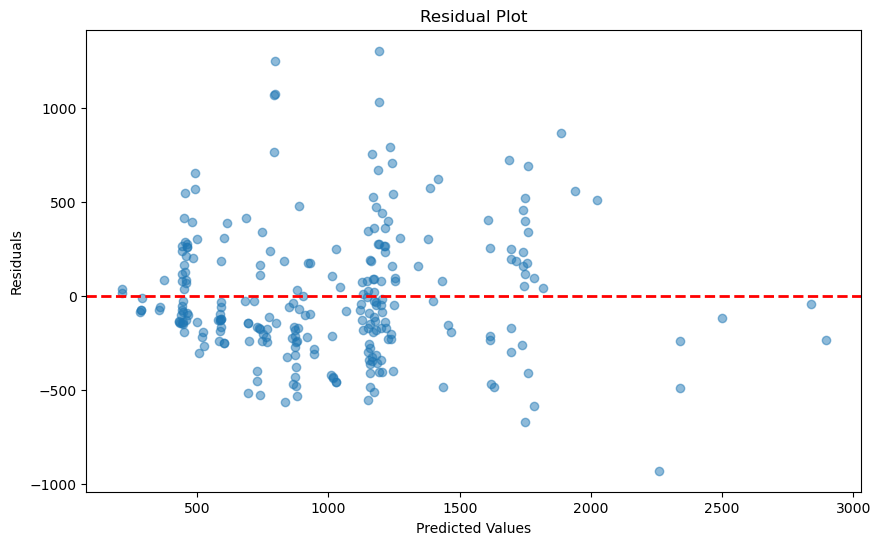

In [200]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# END